# Fuel Economy analysis
The datasets for this case study are taken from https://www.fueleconomy.gov/feg/download.shtml

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df8 = pd.read_csv('datasets/all_alpha_08.csv')
df8.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [2]:
df18 = pd.read_csv('datasets/all_alpha_18.csv')
df18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


## Explore the datasets

In [3]:
df8.shape,df18.shape

((2404, 18), (2713, 18))

In [4]:
df8.duplicated().sum()

25

In [5]:
df18.duplicated().sum()

0

In [6]:
df8.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [7]:
df18.nunique()

Model                   652
Displ                    45
Cyl                       9
Trans                    29
Drive                     2
Fuel                      6
Cert Region               2
Stnd                     25
Stnd Description         25
Underhood ID            422
Veh Class                10
Air Pollution Score       7
City MPG                113
Hwy MPG                 119
Cmb MPG                 110
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                404
dtype: int64

In [8]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


In [9]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 18 columns):
Model                   2713 non-null object
Displ                   2663 non-null float64
Cyl                     2663 non-null float64
Trans                   2713 non-null object
Drive                   2713 non-null object
Fuel                    2713 non-null object
Cert Region             2713 non-null object
Stnd                    2713 non-null object
Stnd Description        2713 non-null object
Underhood ID            2713 non-null object
Veh Class               2713 non-null object
Air Pollution Score     2713 non-null int64
City MPG                2713 non-null object
Hwy MPG                 2713 non-null object
Cmb MPG                 2713 non-null object
Greenhouse Gas Score    2713 non-null int64
SmartWay                2713 non-null object
Comb CO2                2713 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 381.6+ KB


In [10]:
df8.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [11]:
df18.isnull().sum()

Model                    0
Displ                   50
Cyl                     50
Trans                    0
Drive                    0
Fuel                     0
Cert Region              0
Stnd                     0
Stnd Description         0
Underhood ID             0
Veh Class                0
Air Pollution Score      0
City MPG                 0
Hwy MPG                  0
Cmb MPG                  0
Greenhouse Gas Score     0
SmartWay                 0
Comb CO2                 0
dtype: int64

In [12]:
df8.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [13]:
df18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [14]:
df8['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [15]:
df18['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Electricity',
       'Ethanol/Gas', 'Hydrogen'], dtype=object)

In [16]:
df8.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [17]:
df18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


## Cleaning the Column labels

### 1. Drop extraneous columns

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use pandas' drop function.
Columns to Drop:

    From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'
    From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'



In [18]:
df8.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [19]:
# drop columns from 2008 dataset
df8.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df8.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [20]:
# drop columns from 2018 dataset
df18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
df18.head()



,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,small car,3,25,35,29,6,No
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,small SUV,3,26,27,27,6,No
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,small SUV,3,26,27,27,6,No
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,small SUV,3,19,27,22,4,No


### 2. Rename Columns

   Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.
   Rename all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.)



In [21]:
# rename Sales Area to Cert Region
df8.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

# confirm changes
df8.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [22]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df8.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df8.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [23]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,small car,3,25,35,29,6,No
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,small SUV,3,26,27,27,6,No
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,small SUV,3,26,27,27,6,No
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,small SUV,3,19,27,22,4,No


In [24]:
# confirm column labels for 2008 and 2018 datasets are identical
df8.columns == df18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [25]:
# make sure they're all identical like this
(df8.columns == df18.columns).all()

True

In [26]:
# save new datasets for future use
df8.to_csv('datasets/data_08.csv', index=False)
df18.to_csv('datasets/data_18.csv', index=False)

## Filter , deduplicate(dedupe) , Drop Nulls

### 1. Filter

For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').


In [27]:
# filter datasets for rows following California standards
df8 = df8.query('cert_region == "CA"')
df18 = df18.query('cert_region == "CA"')

In [28]:
# confirm only certification region is California
df8['cert_region'].unique()

array(['CA'], dtype=object)

In [29]:
# confirm only certification region is California
df18['cert_region'].unique()

array(['CA'], dtype=object)

In [30]:
# drop certification region columns form both datasets
df8.drop('cert_region', axis=1, inplace=True)
df18.drop('cert_region', axis=1, inplace=True)

In [31]:
df8.shape,df18.shape

((1084, 13), (1341, 13))

## 2. Drop Rows with Missing Values

In [32]:
# view missing value count for each feature in 2008
df8.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [33]:
# view missing value count for each feature in 2018
df18.isnull().sum()

model                    0
displ                   24
cyl                     24
trans                    0
drive                    0
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                 0
hwy_mpg                  0
cmb_mpg                  0
greenhouse_gas_score     0
smartway                 0
dtype: int64

In [34]:
# drop rows with any null values in both datasets
df8.dropna(inplace=True)
df18.dropna(inplace=True)

In [35]:
# checks if any of columns in 2008 have null values - should print False
df8.isnull().sum().any()

False

In [36]:
# checks if any of columns in 2018 have null values - should print False
df18.isnull().sum().any()

False

## 3. Dedupe Data

In [37]:
# print number of duplicates in 2008 and 2018 datasets
print(df8.duplicated().sum())
print(df18.duplicated().sum())

23
10


In [38]:
# drop duplicates in both datasets
df8.drop_duplicates(inplace=True)
df18.drop_duplicates(inplace=True)

In [39]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df8.duplicated().sum())
print(df18.duplicated().sum())

0
0


In [40]:
df8.shape,df18.shape

((986, 13), (1307, 13))

In [41]:
# save progress for the next section
df8.to_csv('datasets/data_08.csv', index=False)
df18.to_csv('datasets/data_18.csv', index=False)

## Fixing Datatypes

we can notice that there are datatype mismatches while comparing both the datasets. Hence we need to fix the datatypes

### 1. Fix `cyl` datatype

    2008: extract int from string.
    2018: convert float to int.



In [42]:
df8['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [43]:
# Extract int from strings in the 2008 cyl column
# we can convert to string and extract integer using regular expression
df8['cyl'] = df8['cyl'].str.extract('(\d+)').astype(int)

In [44]:
# Check value counts for 2008 cyl column again to confirm the change
df8['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [45]:
# convert 2018 cyl column to int
df18['cyl'] = df18['cyl'].astype(int)

In [46]:
df8.to_csv('datasets/data_08_v1.csv', index=False)
df18.to_csv('datasets/data_18_v1.csv', index=False)

### 2. Fix `air_pollution_score` datatype

    2008: convert string to float.
    2018: convert int to float.


In [48]:
# try using Pandas to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
df8.air_pollution_score = df8.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

### Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [49]:
df8[df8.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


### It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. 

In [50]:
# First, let's get all the hybrids in 2008
hb8 = df8[df8['fuel'].str.contains('/')]
hb8

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [51]:
# hybrids in 2018
hb18 = df18[df18['fuel'].str.contains('/')]
hb18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
59,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
175,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
227,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
229,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
259,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
344,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,3,23/55,25/57,24/56,8,Yes
355,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Gasoline/Electricity,small car,7,36/117,33/101,35/109,10,Elite
359,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Gasoline/Electricity,small car,7,36/117,33/101,35/109,10,Elite
418,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline/Electricity,midsize car,3,23/56,29/71,25/62,10,Yes
532,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [52]:
# create two copies of the 2008 hybrids dataframe
copy1 = hb8.copy() # data on first fuel type of each hybrid vehicle
copy2 = hb8.copy() # data on second fuel type of each hybrid vehicle

# Each one should look like this
copy1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [53]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    copy1[c]=copy1[c].apply(lambda x:x.split('/')[0])
    copy2[c]=copy2[c].apply(lambda x:x.split('/')[1])

In [54]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
copy1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [55]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
copy2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [56]:
# combine dataframes to add to the original dataframe
new_rows = copy1.append(copy2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [57]:
# drop the original hybrid rows
df8.drop(hb8.index,inplace=True)

# add in our newly separated rows
df8 = df8.append(new_rows,ignore_index=True)

In [58]:
# check that all the original hybrid rows with "/"s are gone
df8[df8['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [59]:
df8.shape

(987, 13)

### Repeat this process for the 2018 dataset

In [60]:
# create two copies of the 2018 hybrids dataframe, hb_18
copy1 = hb18.copy()
copy2 = hb18.copy()

### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
You don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.

In [61]:
split_columns = ['fuel','city_mpg','hwy_mpg','cmb_mpg']

for c in split_columns:
    copy1[c] = copy1[c].apply(lambda x: x.split("/")[0])
    copy2[c] = copy2[c].apply(lambda x: x.split("/")[1])

copy1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
59,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline,small car,7,34,39,36,10,Elite
175,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
227,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
229,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
259,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
344,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,3,23,25,24,8,Yes
355,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Gasoline,small car,7,36,33,35,10,Elite
359,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Gasoline,small car,7,36,33,35,10,Elite
418,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline,midsize car,3,23,29,25,10,Yes
532,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No


In [62]:
copy2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
59,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Electricity,small car,7,81,86,83,10,Elite
175,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3,66,78,71,10,Yes
227,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,small car,7,70,75,72,10,Elite
229,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,small car,7,66,68,67,10,Elite
259,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,large car,3,62,68,64,9,Yes
344,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Electricity,standard SUV,3,55,57,56,8,Yes
355,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Electricity,small car,7,117,101,109,10,Elite
359,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Electricity,small car,7,117,101,109,10,Elite
418,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Electricity,midsize car,3,56,71,62,10,Yes
532,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,large car,5,18,28,22,4,No


In [63]:
# append the two dataframes
new_rows = copy1.append(copy2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df18.drop(hb18.index, inplace=True)

# append new_rows to df_18
df18 = df18.append(new_rows, ignore_index=True)

In [64]:
# check that they're gone
df18[df18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [65]:
df18.shape

(1383, 13)

### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [66]:
# convert string to float for 2008 air pollution column
df8.air_pollution_score = df8.air_pollution_score.astype(float)

In [67]:
# convert int to float for 2018 air pollution column
df18.air_pollution_score = df18.air_pollution_score.astype(float)

In [68]:
df8.to_csv('datasets/data_08.csv', index=False)
df18.to_csv('datasets/data_18.csv', index=False)

### 3. Fix `city_mpg, hwy_mpg, cmb_mpg` datatypes

    2008 and 2018: convert string to float.

Fix `greenhouse_gas_score` datatype

    2008: convert from float to int.


In [69]:
df8.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [70]:
df18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [71]:
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_columns:
    df18[c] = df18[c].astype(float)
    df8[c] = df8[c].astype(float)

In [75]:
df8['greenhouse_gas_score'] = df8['greenhouse_gas_score'].astype(int)

In [76]:
(df8.dtypes == df18.dtypes).all()

True

In [77]:
df8.to_csv('datasets/clean_08.csv')
df18.to_csv('datasets/clean_18.csv')

## Exploring with Visuals

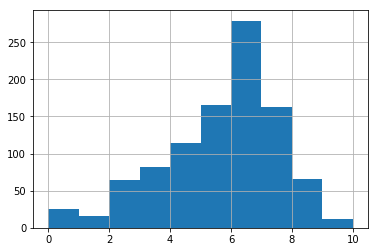

In [78]:
df8.greenhouse_gas_score.hist();

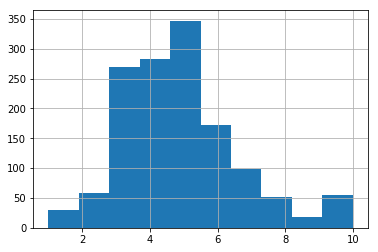

In [80]:
df18.greenhouse_gas_score.hist();

we can observe that the distribution of greenhouse gas score is more skewed to left in 2008 when compared to 2018

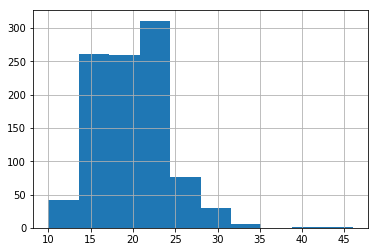

In [81]:
df8.cmb_mpg.hist();

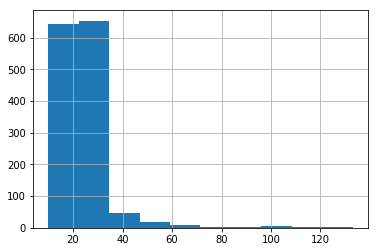

In [82]:
df18.cmb_mpg.hist();

The distribution of combined mpg has changed from 2008 to 2018 and became much more skewed to the right

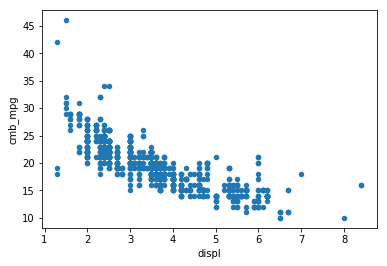

In [85]:
df8.plot(x='displ',y='cmb_mpg',kind='scatter');

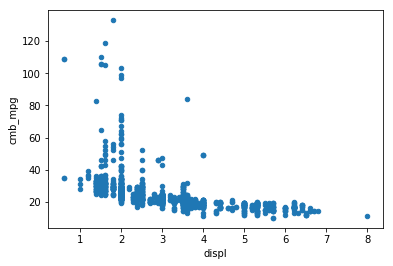

In [86]:
df18.plot(x='displ',y='cmb_mpg',kind='scatter');

We can analyse that there is a negative correlation between displacement and combined mpg

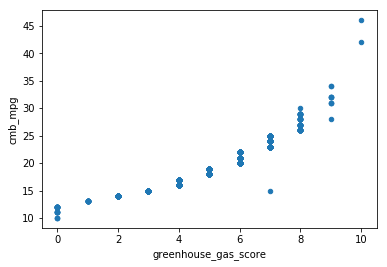

In [87]:
df8.plot(x='greenhouse_gas_score',y='cmb_mpg',kind='scatter');

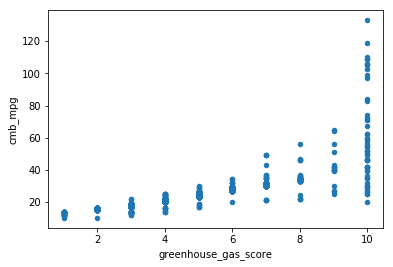

In [88]:
df18.plot(x='greenhouse_gas_score',y='cmb_mpg',kind='scatter');

we can analyse that there is a positive correlation between greenhouse gas score and combined mpg

## Drawing conclusions

### Q1: Are more unique models using alternative sources of fuel? By how much?

Let's first look at what the sources of fuel are and which ones are alternative sources.

In [89]:
df8.fuel.value_counts()

Gasoline    984
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [90]:
df18.fuel.value_counts()

Gasoline       1229
Ethanol          41
Gas              41
Diesel           37
Electricity      35
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [93]:
alt8 = df8.query('fuel in ["CNG","ethanol"]')
alt8

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
388,HONDA Civic,1.8,4,Auto-L5,2WD,CNG,small car,9.5,24.0,36.0,28.0,9,yes
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no


In [94]:
alt8 = alt8['model'].nunique()
alt8

2

In [98]:
alt18 = df18.query('fuel in ["Ethanol","Electricity"]')['model'].nunique()
alt18

52

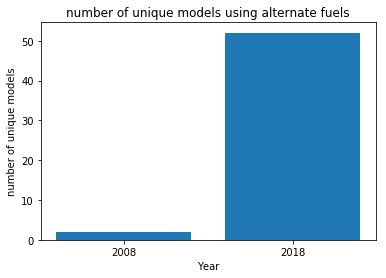

In [100]:
plt.bar(["2008","2018"],[alt8,alt18])
plt.title("number of unique models using alternate fuels")
plt.xlabel("Year")
plt.ylabel("number of unique models");

Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [101]:
model8 = df8.model.nunique()
model18 = df18.model.nunique()
model8,model18

(377, 616)

In [102]:
prop8 = alt8/model8
prop18 = alt18/model18
prop8,prop18

(0.005305039787798408, 0.08441558441558442)

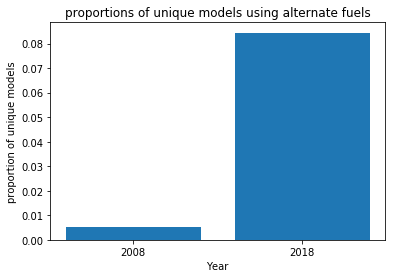

In [103]:
plt.bar(["2008","2018"],[prop8,prop18])
plt.title("proportions of unique models using alternate fuels")
plt.xlabel("Year")
plt.ylabel("proportion of unique models");

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [104]:
veh8 = df8.groupby('veh_class')['cmb_mpg'].mean()
veh8

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [105]:
veh18 = df18.groupby('veh_class')['cmb_mpg'].mean()
veh18

veh_class
large car          24.431507
midsize car        30.169725
minivan            27.166667
pickup             18.250000
small SUV          24.333333
small car          25.673759
special purpose    19.705882
standard SUV       19.405405
station wagon      30.054545
van                16.000000
Name: cmb_mpg, dtype: float64

In [110]:
inc = veh18 - veh8
inc

veh_class
SUV                     NaN
large car          5.922416
midsize car        8.568275
minivan            8.049020
pickup             1.972892
small SUV               NaN
small car          4.568654
special purpose         NaN
standard SUV            NaN
station wagon      7.687879
van                1.047619
Name: cmb_mpg, dtype: float64

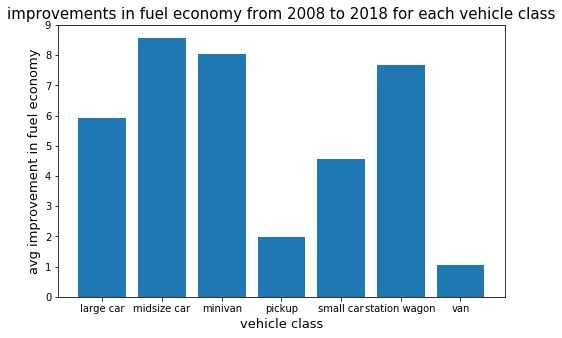

In [115]:
inc.dropna(inplace=True)
plt.subplots(figsize = (8,5))
plt.bar(inc.index,inc)
plt.title('improvements in fuel economy from 2008 to 2018 for each vehicle class',fontsize=15)
plt.xlabel('vehicle class',fontsize=13)
plt.ylabel('avg improvement in fuel economy',fontsize=13);

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.`

In [121]:
df8.smartway.unique()

array(['no', 'yes'], dtype=object)

In [122]:
df18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [125]:
smart8 = df8.query('smartway in ["yes"]')
smart8.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [127]:
smart18 = df18.query('smartway in["Yes","Elite"]')
smart18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.896759,4.162037,5.259259,38.291667,43.541667,40.231481,8.143519
std,0.625161,0.923413,1.826779,21.324582,17.176732,19.306635,1.217223
min,0.600000,2.000000,3.000000,19.000000,23.000000,21.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,35.000000,31.000000,7.000000
50%,1.800000,4.000000,6.000000,30.000000,38.000000,33.000000,8.000000
75%,2.000000,4.000000,7.000000,40.000000,43.000000,42.000000,9.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000


### Q4: What features are best assosciated with better fuel economy?

We can explore trends and correlations between cmb_mpg and different features of the dataset or filter this dataset according to requirements like in above case and explore it. For example we can select all the vehicles with top 50% fuel economy and analyse them

In [130]:
top8 = df8.query('cmb_mpg >= cmb_mpg.mean()')
top8.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [131]:
top18 = df18.query('cmb_mpg >= cmb_mpg.mean()')
top18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,1.985428,4.094718,4.934426,29.675774,36.641166,32.284153,6.526412
std,0.496196,0.635154,1.884260,15.196900,12.290901,13.816292,1.560733
min,0.600000,2.000000,1.000000,21.000000,26.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,29.000000,37.000000,32.000000,7.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000


### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. 

In [132]:
df8.rename(columns= lambda x: x+"_2008",inplace=True)
df18.rename(columns= lambda x: x+"_2018",inplace=True)

In [133]:
df8.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_gas_score_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [134]:
df18.head()

,model_2018,displ_2018,cyl_2018,trans_2018,drive_2018,fuel_2018,veh_class_2018,air_pollution_score_2018,city_mpg_2018,hwy_mpg_2018,cmb_mpg_2018,greenhouse_gas_score_2018,smartway_2018
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,25.0,35.0,29.0,6,No
1,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No
2,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
3,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
4,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No


In [135]:
df = df8.merge(df18,left_on = "model_2008", right_on="model_2018", how="inner")
df.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,...,trans_2018,drive_2018,fuel_2018,veh_class_2018,air_pollution_score_2018,city_mpg_2018,hwy_mpg_2018,cmb_mpg_2018,greenhouse_gas_score_2018,smartway_2018
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No
4,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4,No


In [140]:
df.dtypes

model_2008                    object
displ_2008                   float64
cyl_2008                       int64
trans_2008                    object
drive_2008                    object
fuel_2008                     object
veh_class_2008                object
air_pollution_score_2008     float64
city_mpg_2008                float64
hwy_mpg_2008                 float64
cmb_mpg_2008                 float64
greenhouse_gas_score_2008      int64
smartway_2008                 object
model_2018                    object
displ_2018                   float64
cyl_2018                       int64
trans_2018                    object
drive_2018                    object
fuel_2018                     object
veh_class_2018                object
air_pollution_score_2018     float64
city_mpg_2018                float64
hwy_mpg_2018                 float64
cmb_mpg_2018                 float64
greenhouse_gas_score_2018      int64
smartway_2018                 object
dtype: object

In [137]:
df.shape

(1454, 26)

In [138]:
df.to_csv('datasets/combined_data.csv')

### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [150]:
model_mpg = df.groupby('model_2008').mean()
model_mpg = model_mpg[['cmb_mpg_2008','cmb_mpg_2018']]
model_mpg.head()

,cmb_mpg_2008,cmb_mpg_2018
model_2008,,
ACURA MDX,17.000000,23.000000
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667


### 2. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [154]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg_2018']-model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg_2018,mpg_change
model_2008,,,
ACURA MDX,17.000000,23.000000,6.000000
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000


### 3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [155]:
max_mpg_change = model_mpg['mpg_change'].max()
max_mpg_change

10.666666666666668

In [156]:
model = model_mpg[model_mpg['mpg_change']==max_mpg_change]
model

,cmb_mpg_2008,cmb_mpg_2018,mpg_change
model_2008,,,
CHEVROLET Malibu,22.333333,33.0,10.666667


Pandas also has a useful [`idxmax`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) function you can use to find the index of the row containing a column's maximum value!

In [157]:
idx = model_mpg.mpg_change.idxmax()
idx

'CHEVROLET Malibu'

In [158]:
model_mpg.loc[idx]

cmb_mpg_2008    22.333333
cmb_mpg_2018    33.000000
mpg_change      10.666667
Name: CHEVROLET Malibu, dtype: float64